In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from week2.CategoricalFeatureEncoder import CategoricalFeatureEncoder
from week2.LRFlow import LRFlow

In [3]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# data understanding

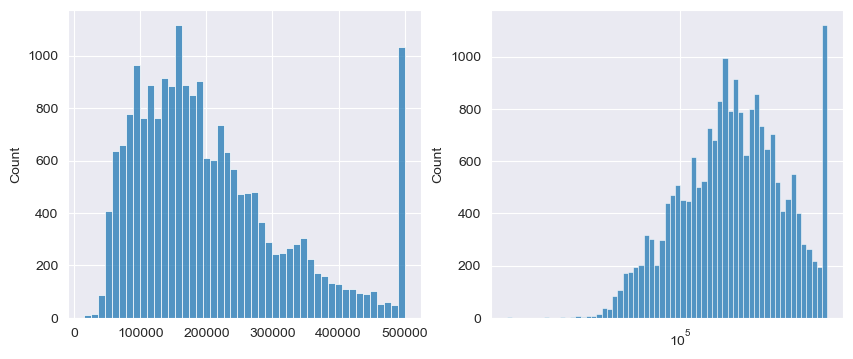

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# plot the histograms on separate subplots
sns.histplot(df.median_house_value.values, ax=axs[0])
sns.histplot(df.median_house_value.values, ax=axs[1], log_scale=True)

# show the plot
plt.show()

# data cleaning

In [5]:
enum_ocean_proximity = df['ocean_proximity'].unique().tolist()

In [6]:
def get_input(df: pd.DataFrame):
    x = df.copy()
    x['ocean_proximity'] = x['ocean_proximity'].str.lower().str.replace(' ', '_')
    x['total_bedrooms'].fillna(x['total_bedrooms'].mean(), inplace=True)
    x, _ = CategoricalFeatureEncoder.one_hot_encode(x, 'ocean_proximity', enum_ocean_proximity)
    x.drop(columns=['median_house_value', 'ocean_proximity'], inplace=True)
    return x.values

0.164


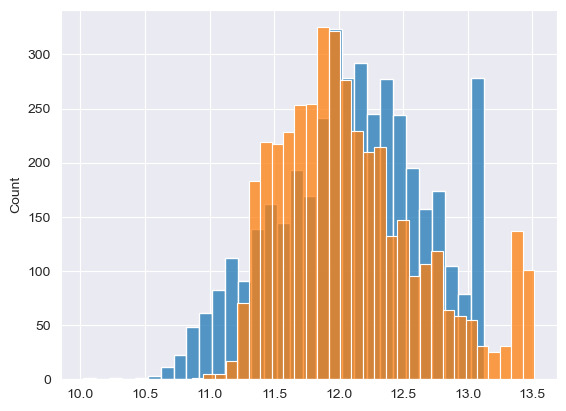

In [9]:
flow = LRFlow(df)
# flow.set_input_modifier(get_input)
print(flow.get_validation_rmse())
flow.plot_validation_predict_vs_actual()

In [11]:
flow.input_modifier(flow.df_validation)

array([[-1.1712e+02,  3.2560e+01,  2.0000e+01, ...,  2.9286e+00,
         2.5770e+05,  0.0000e+00],
       [-1.2096e+02,  4.1120e+01,  2.9000e+01, ...,  2.5000e+00,
         5.9200e+04,  0.0000e+00],
       [-1.2162e+02,  3.9090e+01,  2.1000e+01, ...,  3.8534e+00,
         9.9700e+04,  0.0000e+00],
       ...,
       [-1.2257e+02,  3.8110e+01,  2.4000e+01, ...,  3.1981e+00,
         2.1530e+05,  0.0000e+00],
       [-1.2228e+02,  3.8220e+01,  4.2000e+01, ...,  7.5197e+00,
         2.7500e+05,  0.0000e+00],
       [-1.1801e+02,  3.3930e+01,  3.4000e+01, ...,  3.2750e+00,
         1.8990e+05,  0.0000e+00]])

In [12]:
flow.df_validation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14790,-117.12,32.56,20.0,2524.0,682.0,1819.0,560.0,2.9286,257700.0,near_ocean
3346,-120.96,41.12,29.0,779.0,136.0,364.0,123.0,2.5000,59200.0,inland
19699,-121.62,39.09,21.0,2693.0,481.0,1337.0,435.0,3.8534,99700.0,inland
17146,-122.19,37.44,38.0,3383.0,456.0,1203.0,465.0,9.3198,500001.0,near_ocean
5562,-118.28,33.91,41.0,620.0,133.0,642.0,162.0,2.6546,159600.0,<1h_ocean
...,...,...,...,...,...,...,...,...,...,...
18383,-121.80,37.19,45.0,1797.0,303.0,870.0,281.0,4.5417,434500.0,<1h_ocean
20498,-118.70,34.29,25.0,1678.0,252.0,862.0,268.0,6.1834,229800.0,<1h_ocean
9274,-122.57,38.11,24.0,2863.0,734.0,1583.0,682.0,3.1981,215300.0,near_bay
9939,-122.28,38.22,42.0,106.0,18.0,40.0,25.0,7.5197,275000.0,near_bay


In [42]:
def get_input_by_frequency_of_categorical_features(df: pd.DataFrame, n: int):
    x = df.copy()
    x['ocean_proximity'] = x['ocean_proximity'].str.lower().str.replace(' ', '_')
    x['total_bedrooms'].fillna(x['total_bedrooms'].mean(), inplace=True)
    x, _ = CategoricalFeatureEncoder.one_hot_encode(x, 'ocean_proximity', enum_ocean_proximity, n)
    x.drop(columns=['median_house_value', 'ocean_proximity'], inplace=True)
    return x.values

In [ ]:
# remove lat and long
# why get_input is worse than default_input_modifier ?